# Download ratings data

In [ ]:
import pandas as pd

def download_data():
  data = pd.read_csv("https://www.dropbox.com/scl/fi/t5tdso2dhahny33bzqgnt/raw_analyst_ratings.csv?rlkey=a9gy46ltupqrexj6r6gs3n8f4&st=5zzopfih&dl=1")
  return data

data = download_data()
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# cleaning the data

In [ ]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

remove unamed and url columns which are not needed

In [ ]:
data = data.drop(columns=['url'], axis=1)

In [ ]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
data.head()

,headline,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,Vick Meyer,2020-05-22 11:38:59-04:00,A


check for data types and correct

In [ ]:
data.dtypes

headline     object
publisher    object
date         object
stock        object
dtype: object

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

In [ ]:
data['date']

0                NaT
1                NaT
2                NaT
3                NaT
4                NaT
             ...    
1407323   2011-08-29
1407324   2011-06-22
1407325   2011-06-21
1407326   2011-06-21
1407327   2011-05-12
Name: date, Length: 1407328, dtype: datetime64[ns]

In [ ]:
data = data.dropna()

In [ ]:
data

,headline,publisher,date,stock
10,30 Stocks Moving in Friday's Pre-Market Session,Lisa Levin,2020-05-22,A
11,SVB Leerink Maintains Outperform on Agilent Te...,vishwanath@benzinga.com,2020-05-22,A
12,8 Stocks Moving In Thursday's After-Hours Session,Tyree Gorges,2020-05-21,A
13,Agilent Technologies shares are trading higher...,Benzinga Newsdesk,2020-05-21,A
14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,Benzinga Newsdesk,2020-05-21,A
...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,Monica Gerson,2011-08-29,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,Benjamin Lee,2011-06-22,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,BenzingaStaffL,2011-06-21,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,Joe Young,2011-06-21,ZX


In [ ]:
data.dtypes

headline             object
publisher            object
date         datetime64[ns]
stock                object
dtype: object

# Descriptive Statistics

calculate min, median and max length of headlines.

In [ ]:
headlines_lengths = data['headline'].str.len()
min_length = headlines_lengths.min()
median_length = headlines_lengths.median()
max_length = headlines_lengths.max()

print("min length = ", min_length)
print("median length = ", median_length)
print("max length = ", max_length)

min length =  3
median length =  64.0
max length =  509


Count the number of articles per publisher to identify which publishers are most active.


In [ ]:
articles_per_publisher = data.groupby('publisher').size().reset_index(name='article_count')
articles_per_publisher

,publisher,article_count
0,47ertrends,18
1,AARP,4
2,ABNNewswire,13
3,Aakin,5
4,Aaron Jackson.Ed,15
...,...,...
1024,vic@forextraininggroup.com,1
1025,vishwanath@benzinga.com,906
1026,vivek.proactive@gmail.com,117
1027,wallstreet1928,8


Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.


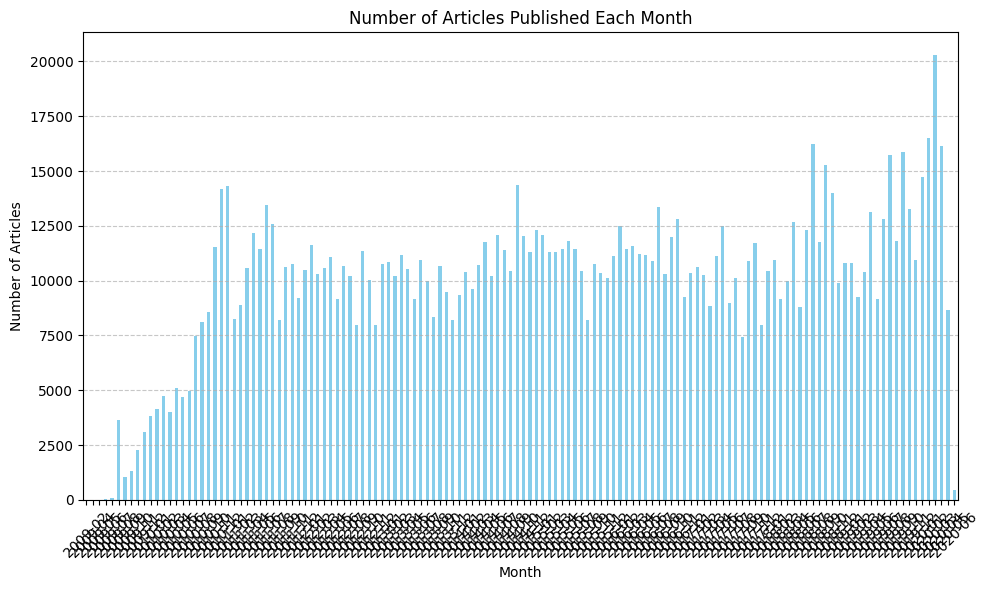

In [ ]:
import matplotlib.pyplot as plt

data['month'] = data['date'].dt.strftime('%Y-%m')

# Count the number of articles published each month
articles_per_month = data['month'].value_counts().sort_index()

# Plot the monthly bar chart
plt.figure(figsize=(10, 6))
articles_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

data = data.drop(columns=['month'])



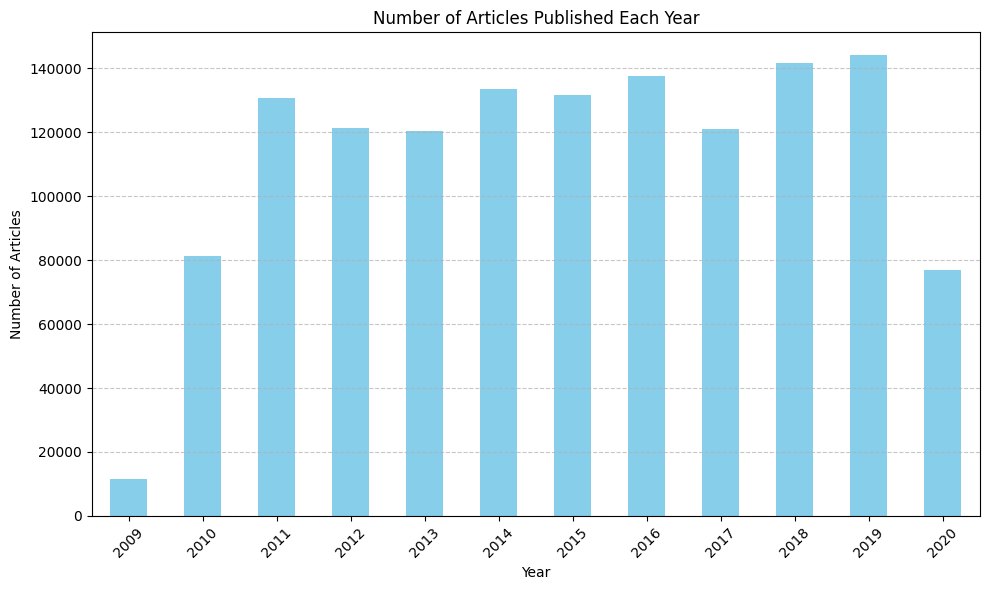

In [ ]:
data['year'] = data['date'].dt.year

# Count the number of articles published each year
articles_per_year = data['year'].value_counts().sort_index()

# Plot the yearly bar chart
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

data = data.drop(columns=['year'])



# Text Analysis(Sentiment analysis & Topic Modeling)

Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.

In [ ]:
from textblob import TextBlob

sentiments = []
for headline in data['headline']:
    blob = TextBlob(headline)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

# Add sentiment column to DataFrame
data['sentiment'] = sentiments
data

,headline,publisher,date,stock,sentiment
10,30 Stocks Moving in Friday's Pre-Market Session,Lisa Levin,2020-05-22,A,neutral
11,SVB Leerink Maintains Outperform on Agilent Te...,vishwanath@benzinga.com,2020-05-22,A,neutral
12,8 Stocks Moving In Thursday's After-Hours Session,Tyree Gorges,2020-05-21,A,neutral
13,Agilent Technologies shares are trading higher...,Benzinga Newsdesk,2020-05-21,A,positive
14,Agilent Technologies Q2 Adj. EPS $0.71 Beats $...,Benzinga Newsdesk,2020-05-21,A,neutral
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,Monica Gerson,2011-08-29,ZX,positive
1407324,Recap: Wednesday's Top Percentage Gainers and ...,Benjamin Lee,2011-06-22,ZX,positive
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,BenzingaStaffL,2011-06-21,ZX,neutral
1407326,Oppenheimer Initiates China Zenix At Outperfor...,Joe Young,2011-06-21,ZX,neutral


Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).


In [ ]:
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS


# Load English language model in spaCy
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):
    # Lowercase conversion
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in STOP_WORDS])
    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www.\S+|[\w\.-]+@[\w\.-]+', '', text)
    return text.strip()

data['headline'] = data['headline'].apply(preprocess_text)


KeyboardInterrupt: 